# Продвинутые методы машинного обучения, Сбербанк
## Домашнее задание

Результат домашнего задания − отчет. Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

Мы уверены, что выполнение домашней работы занимает значительное время, поэтому не рекомендуем оставлять ее на последний вечер перед сдачей.

### Оценивание и штрафы
* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимальная оценка за работу — 100 баллов
* На выполнение задания дается 3 недели после публикации домашнего задания в Виртуальной Школе
* «Похожие» решения считаются плагиатом и все задействованные слушатели (в том числе те, у кого списали) не могут получить за него больше 0 баллов

### Формат сдачи
Подпишите ваш jupyter-ноутбук с кодом в следующем формате: `ML_SBER_ADVANCED_NAME_SURNAME`, где вместо NAME и SURNAME вставьте ваше имя и фамилию

## Оценивание качества классификации

Перед тем, как приступить к выполнению заданий, рассмотрим метрики классификации, которые нам пригодятся в дальнейшем.

### Accuracy, Precision, Recall

Хорошее описание метрик есть на википедии: https://en.wikipedia.org/wiki/Precision_and_recall

- Accuracy: $$ Accuracy = \frac{1}{l}\sum_{i=1}^l[y_i = \hat{y}_i]$$ где $y_i$ — истинный ответ на объекте $x_i$, $\hat{y}_i$ — предсказанный. (Мы не рекомендуем переводить *accuracy* как точность, потому что в русскоязычной литературе точностью называют другую метрику)
- Precision (точность): $$Precision = \frac{TP}{TP + FP}$$
- Recall (полнота): $$Recall = \frac{TP}{TP + FN}$$

Обратите внимание, что точность и полнота вычисляются относительно фиксированного класса. В sklearn есть удобная функция [classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), позволяющая сразу вычислять эти метрики для всех классов. 

Точность и полнота хороши тем, что могут быть использованы в случае несбалансированных данных, однако сразу же две метрики оптимизировать неудобно.

### Precision-Recall кривая

Зачастую классификатор может возвращать не конкретный класс, а некоторую меру принадлежности заданному классу $b(x)$. Затем значение $b(x)$ сравнивается с фиксированным порогом *t*, и на самом деле классификатор имеет вид $a(x) = [b(x) > t]$. Таким образом, при оценивании качества работы классификатора можно использовать его ответ $b(x)$ и подбирать порог *t* исходя из некоторых условий. Кроме того, выбор порога влияет на качество классификации:
 - чем больше $t$, тем выше точность, но ниже полнота,
 - чем меньше $t$, тем выше полнота, но ниже точность.

Раз мы умеем варьировать порог классификатора, тем самым меняя качество, интересно каким оно будет при всех возможных различных порогах. Для этого строят следующий график: переберем все возможные пороги $t$, откладывая по оси OX полноту получившегося классификатора, а по оси OY — точность. Таким образом можно получить хорошую визуализацию качества алгоритма.

### ROC кривая

Еще один из способ визуализации зависимости метрик качества от порога, подходящей в этом случае, является *ROC*. По осям: 
 - OX: $FPR = \frac{FP}{FP + TN}$
 - OY: $TPR = \frac{TP}{TP + FN}$

Как следствие, можно измерять площади под указанными кривыми — *Precision-Recall AUC* и *AUC-ROC* соответственно.

### LogLoss

В бинарном случае эта метрика записывается как $$logloss = -\dfrac{1}{N}\sum_{i=1}^N (y_i\log{p_i} + (1-y_i)\log{(1 - p_i)})$$

В отличии от *AUC-ROC*, для этой метрики необходимо, чтобы классификатор умел предсказывать вероятность принадлежности к классу, а не "степень принадлежности классу 1" в неопределенной шкале. Приведем пример. Вероятностная шкала может быть нужна, если вы хотите оценить количество денег, которые в среднем принесёт пользователь, кликнув на баннер. Для этого необходимо умножить количество денег, которые вы получаете за клик на баннер, на вероятность клика пользователя, которую предсказывает модель.

## Работа с текстовыми данными

В этом задании мы будем работать с подмножеством датасета IMDB Movies Reviews из соревнования [Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data). 
![](http://i.imgur.com/QZgxFic.png)

Задача состоит в следующем: по отзыву на фильм необходимо понять является ли он положительным или отрицательным. Это один из примеров задачи анализа тональности текста ([sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis)). Пример отзыва из выборки:
    
    This can be one of the most enjoyable movies ever if you don't take it seriously. It is a bit dated and the effects are lame, but it is so enjoyable. There are giant crabs that attack a girl. oh, and the crabs sing Japanese. It is amazingly bad. And the ending, which has been telegraphed throughout the entire film is hideously awesome. Predictable, but seeing the final fight will leave you rolling in your seat. Don't even give this film a chance and you will love it. Susan George is fun to watch and yes, she does appear naked. Her daughter isn't quite worth putting up with, but she does get attacked by giant crabs. They are the size of large cats. This is a 2, but I love it. As a movie, my God, but for entertainment, I give it a 7. Did I mention there are giant crabs?

#### Загрузите датасет из файла *feedback_data.tsv*.

**wget под Windows10 не сработал**

выполнил conda install posix, не помогло

пришлось заменить на curl и переключиться на ссылку амазона


In [1]:
# скачиваем файл с данными
# он называется "feedback_data.tsv"
! curl https://purple-juno.s3.eu-north-1.amazonaws.com/feedback_data.tsv --output feedback_data.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  4 25.4M    4 1053k    0     0  1065k      0  0:00:24 --:--:--  0:00:24 1066k
  7 25.4M    7 1988k    0     0  1028k      0  0:00:25  0:00:01  0:00:24 1028k
 15 25.4M   15 3977k    0     0  1355k      0  0:00:19  0:00:02  0:00:17 1355k
 23 25.4M   23 6186k    0     0  1572k      0  0:00:16  0:00:03  0:00:13 1572k
 28 25.4M   28 7461k    0     0  1510k      0  0:00:17  0:00:04  0:00:13 1511k
 32 25.4M   32 8363k    0     0  1409k      0  0:00:18  0:00:05  0:00:13 1477k
 34 25.4M   34 9060k    0     0  1301k      0  0:00:20  0:00:06  0:00:14 1406k
 43 25.4M   43 11.0M    0     0  1426k      0  0:00:18  0:00:07  0:00:11 1468k
 54 25.4M   54 13.7M    0     0  1578k      0  0:00:16  0:00:08  0:00:08 1583k
 62 25.4M   62 15.8M    0     0  1636k      0  0:00

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_text = pd.read_table("feedback_data.tsv")
df_text.head()

,id,sentiment,review
0,6678_2,0,"This is a copy of the 1948 Doris Day classic, ..."
1,11589_3,0,Bottom-of-the-Freddy barrel. This is the worst...
2,6760_2,0,Renown writer Mark Redfield (as Edgar Allen Po...
3,1150_4,0,Although there are some snippets in this 4-par...
4,11913_4,0,"A good idea, badly implemented. While that cou..."


В колонке `sentiment` находятся числа `0` и `1`. `1` - если отзыв положительный, `0` - если отрицательный

В данной задаче `sentiment` является целевой переменной - мы хотим по тексту понять, является ли отзыв положительным или отрицательным

На практике эта задача нужна для мониторинга упоминаний компании в социальных сетях. Негативные отзывы можно обрабатывать и отвечать на них вежливо сотрудниками службы поддержки

Выделим целевую переменную в отдельный вектор и удалим ее из данных. Также уделим из данных колонку `id`, которая обозначает id фильма, так как нам не нужна информация о порядковом номере фильма.

In [3]:
y = df_text['sentiment'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [4]:
df_text.drop(['id', 'sentiment'], axis=1, inplace=True)
df_text.shape

(20000, 1)

Видим, что всего есть 20 тыс отзывов

In [5]:
np.sum(y == 1)

7500

In [6]:
np.sum(y == 0)

12500

Из них 7500 отзывов являются положительными, а остальные 12500 отзывов - отрицательными

Посмотрим поближе на данные - какие отзывы положительные, а какие отрицательные

Вот пример двух отрицательных отзывов (целевая метка у них равна `0`)

In [7]:
review_index = 0
print(df_text['review'][review_index])
print()
print(y[review_index])

This is a copy of the 1948 Doris Day classic, Romance on the High Seas.<br /><br />The story line is more or less same but is contemporary. Govinda plays a sharp witted fellow who replaces the husband on the trip. While Rani plays the college friend of the wife who does her the same favour. They ostensibly try to catch each other out while the actual husband and wife tries to trip each other in Bombay.<br /><br />On the trip, Govinda mistakes another girl for Sanjiv's wife and spies on her while falling in love with the ravishing Rani.<br /><br />Lever plays a dual role of father and son both lawyers specialising in divorce proceedings. They are pitted against each other for the warring couple.<br /><br />It is a poor attempt at copying the original classics and the songs are quite appalling. The comedy is slap-stick and will not make one laugh too much.

0


In [8]:
review_index = 10
print(df_text['review'][review_index])
print()
print(y[review_index])

I'm sure to people watching this move outside of Britian this film will be an entertaining watch, but for someone from the UK it's painful in it's errors.<br /><br />Right at the start of the film Elijah Wood gets off a tube at Bank station, which has been trashed. He says to his sister, who he's meeting, \What happened here\" and she replies \"Oh Tottenham were in town yesterday\"!!! Tottenham are in town already.. they're part of the town, they don't have to go there! And if Tottenham fans wanted to fight other fans the last place on earth they'd do it is Bank station, where there are probably more security cameras than anywhere else in the world.<br /><br />There are several other similar errors but the biggest failing for me is the actor who plays the lead hooligan. He clearly decided it wasn't worth trying to speak with an East End accent and instead opted for a Dick Van Dyke style mock-ney which made my ears bleed. It was accentuated by the fact the rest of his gang all spoke in 

А вот пример двух положительных отзывов (целевая метка у них равна `1`)

In [9]:
review_index = 18000
print(df_text['review'][review_index])
print()
print(y[review_index])

Pandro S. Berman was \In Charge of Production\" but that made him the so-called Line Producer. But who produced this epic, filmed not in Arizona but in California's Mohave Desert where scavengers have made off with all of the remnants of the \"gold temple\", the Thuggee huts, the British outpost at Muri, the village of Tantrapur, etc. The minor technical faults can and must be forgiven. What's unforgivable is the lack of an Oscar for best music, although maybe the Academy didn't offer such at the time. A single theme was played in various tempos including waltz, march and sweet, mood-setting. Brilliant! One of the curious aspects of the production was the widow Kipling's demands. An actor playing Kipling appears briefly before and after the battle scenes. In the initial release his scenes were cut, per Mrs. Kipling's demands. Later they were included and lent a \"connection\" of Kipling's immortal poem to Ben Hecht's screenplay. Interestingly, this very typically and pro-British story 

In [10]:
review_index = 19000
print(df_text['review'][review_index])
print()
print(y[review_index])

What can i say about a tale such as this? This magical tale has followed me from my early childhood,evoking warm memories in my heart.The characters take you to to so many whimsical places making you want more of each scene. For example in the market there were so many different flavors of lore. I loved the exotic dancers that accompanied the steel drums.<br /><br />The story line was wonderful.I wanted so badly for Landsbury to decide to keep the precocious children and for her to also stay with Mr.Brown,and find the other half of the spell so that the men less armor could win the war.<br /><br />I am still a child inside,and this movie appeals to my inner child like no other. This movie is my definite favorite of all times. I hope that all children will be able to watch this classic and be swept away,and transported into another time.

1


Интуитивно понятно, что хорошие отзывы будут содержать больше положительно окраженных слов (`good`, `interesting`, `wonderful`, `great`, `like`, и.т.д.), а отрицательные отзывы будут содержать больше отрицательно окрашенных слов (`poor`, `boring`, `dislike`). А есть слова, которые в контексте с другими могут менять окраску отзыва (например `I don't like`, хотя казалось бы, слово `like` должно делать отзыв более положительно окрашенным)

**Идея заключается в том**, чтобы с помощью машинного обучения автоматически понять, какие слова являются наиболее характерными и специфичными для понимания тональности отзыва. При этом о словах мы не будем знать ничего кроме того, что весь отзыв является положительным или отрицательным.

Для начала импортируем необходимые модули для работы с данными

In [11]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib
%matplotlib inline

import time
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

Для оценивания качества в данной задаче мы будем использовать отложенную выборку. Разделите все данные на две части: 16000 объектов будут в обучающей выборке и 4000 объектов — в тестовой.

При разбиении выборки на две части, необходимо будет учесть следующие особенности разбиения:
 - разбиение должно быть воспроизводимо;
 - соотношение классов в каждой из частей должно сохраняться (например, при использовании функции *train_test_split* указать *stratify*).

Одна из сложностей данной задачи — текстовое представление данных, так как не существует какого-то универсального способа извлечения признаков из текстов. По ходу работы мы получим несколько наборов признаков, которые будем сравнивать между собой.

Для начала попробуем самый простой подход, а именно [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model) кодирование данных. С помощью него каждый текст будет представлен в виде вектора, размер которого равен размеру словаря, а на каждой позиции стоит число, сколько раз соответствующее слово встретилось в этом тексте. Для данного подхода хорошей практикой является фильтрация стоп-слов (то есть наиболее частых и общеупотребимых слов, которые не несут большой смысловой нагрузки - предлоги, союзы, местоимения).

Такое представление можно получить используя класс [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) из библиотеки sklearn. Одно из удобств данного метода состоит в том, что возвращаемый результат является [sparse](http://docs.scipy.org/doc/scipy-0.15.1/reference/sparse.html)-матрицей, так как при таком преобразовании получается достаточно много нулей. Более подробно про такие матрицы было рассказано на [семинаре](https://nbviewer.jupyter.org/urls/dl.dropbox.com/s/xswzs2g414wggh9/seminar_8.ipynb), также про это можно прочитать, например, [здесь](http://www.scipy-lectures.org/advanced/scipy_sparse/index.html).

Кодирование текстовых данных с помощью *bag-of-words* написано за вас. Здесь и в дальнейшем будем обучать преобразование на обучающей выборке, после чего применять его к тестовой.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_text['review'].values, y, test_size=0.2, stratify=y, random_state=42)

In [75]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [14]:
vocabulary = vectorizer.get_feature_names()
print('Размер словаря: %d'%len(vocabulary))

Размер словаря: 62407


In [15]:
X_train_bow

<16000x62407 sparse matrix of type '<class 'numpy.int64'>'
	with 2204287 stored elements in Compressed Sparse Row format>

In [16]:
X_test_bow

<4000x62407 sparse matrix of type '<class 'numpy.int64'>'
	with 542271 stored elements in Compressed Sparse Row format>

Теперь мы получили привычное нам представление данных в машинном обучении - матрица признаков и вектор ответов

# Часть 1 - 60 баллов

## 1.1 Обучение алгоритмов классификации и подсчет метрик (30 баллов)
**По 15 баллов за логистическую регрессию и за случайный лес**

Обучите логистическую регрессию и случайный лес с 500 деревьев на *bag-of-words* представлении выборки (датафреймы `X_train_bow` и целевая переменная `y_train`) и измерьте качество на тестовых данных (`X_test_bow` и `y_test`) с помощью трех описанных выше метрик: ``Accuracy``, ``Precision``, ``Recall``

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train_bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [19]:
y_pred = log_reg_classifier.predict(X_test_bow)

In [20]:
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred)
logreg_recall = recall_score(y_test, y_pred)

In [21]:
print("Logistic Regression results")
print("Accuracy test score:\t", round(logreg_accuracy,3) )
print("Precision test score:\t" , round(logreg_precision,3))
print("Recall test score:\t" , round(logreg_recall,3))

Logistic Regression results
Accuracy test score:	 0.87
Precision test score:	 0.825
Recall test score:	 0.828


In [22]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=500)
random_forest_classifier.fit(X_train_bow, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
randomForest_y_pred = random_forest_classifier.predict(X_test_bow)

In [24]:
randomForest_accuracy = accuracy_score(y_test, randomForest_y_pred)
randomForest_precision = precision_score(y_test, randomForest_y_pred)
randomForest_recall = recall_score(y_test, randomForest_y_pred)

print("Random Forest results")
print("Accuracy test score:\t", round( randomForest_accuracy,3) )
print("Precision test score:\t", round( randomForest_precision,3) )
print("Recall test score:\t", round(randomForest_recall,3) )

Random Forest results
Accuracy test score:	 0.798
Precision test score:	 0.941
Recall test score:	 0.491


Посмотрев на указанные метрики, можно понять, что классификаторы неплохо справляются с нулевым классом и похуже — с первым. Скорее всего, это является следствием того, что положительных отзывов почти вдвое меньше чем отрицательных. В дальнейшем нас будет интересовать как классификатор справляется именно с положительными отзывами (то есть с первым классом).

## 1.2 Построение ROC кривой и Precision-Recall кривой - 30 баллов
**по 15 баллов за ROC кривую и Precision-Recall кривую**

Постройте *Precision-Recall* и *ROC* кривые обученных выше классификаторов (каждый тип кривой на отдельном графике), а также вычислите площадь под ними. Для этого удобно воспользоваться функциями [precision_recall_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html), [roc_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) и [auc](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc). 

Не забудьте, что в данном случае необходимо использовать метод `predict_proba` для получения оценки принадлежности к первому классу.

### ROC curve (15 баллов)

Руководство по построению ROC-кривой с кодом: https://stackabuse.com/understanding-roc-curves-with-python/

Еще одно руководство по построению ROC-кривой с кодом: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

Документация в sklearn: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [25]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [26]:
def roc_curve_show (false_positive_rate, true_positive_rate, title):
    # задаем размер графика
    plt.figure(figsize=(10,7))
    
    plt.plot(false_positive_rate, true_positive_rate, label = "ROC")
    plt.axes()
    plt.xlabel('FPR', size=20)
    plt.ylabel('TPR', size=20)
    plt.legend()
    plt.title(title, size = 20)
    plt.grid()

    plt.show()


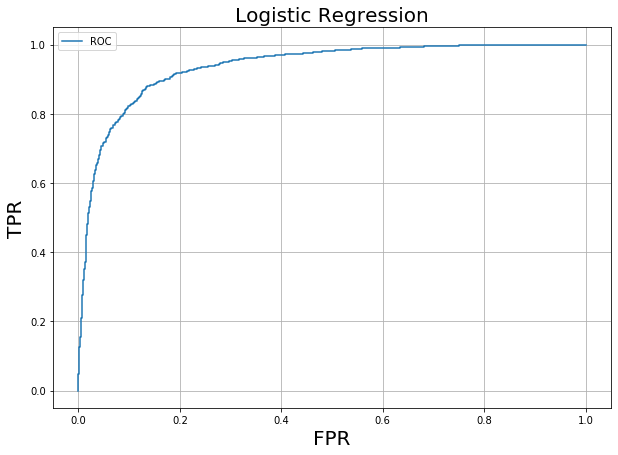

Logistic Regression AUC	 0.936


In [27]:

# получаем от обученных моделей вероятности принадлежности объектов к 1му классу
y_pred_log_reg = log_reg_classifier.predict_proba(X_test_bow)[:, 1]
y_pred_random_forest = random_forest_classifier.predict_proba(X_test_bow)[:, 1]

# Дальне постройте ROC-кривую, используя руководства по трем ссылкам выше

log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, y_pred_log_reg)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, y_pred_random_forest)

    
roc_curve_show(log_reg_fpr, log_reg_tpr, "Logistic Regression")
print("Logistic Regression AUC\t", round(auc(log_reg_fpr, log_reg_tpr),3))

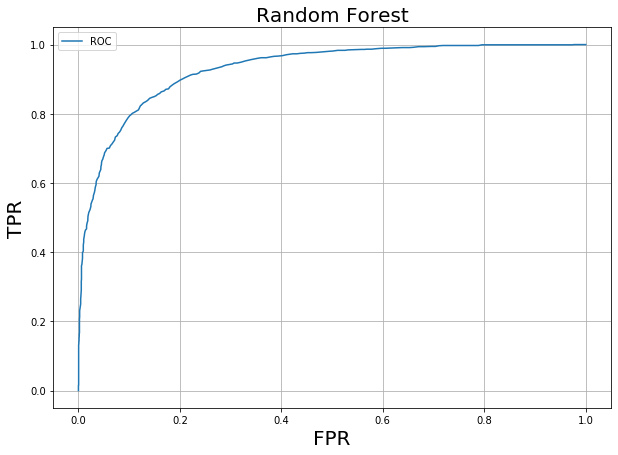

Random Forest AUC	 0.93


In [28]:
roc_curve_show(random_forest_fpr, random_forest_tpr, "Random Forest")
print("Random Forest AUC\t", round(auc(random_forest_fpr, random_forest_tpr),3))

$$
precision = \frac{TP}{TP+FP}
$$
$$
recall = \frac{TP}{TP+FN}
$$

$$
TPR = \frac{TP}{TP+FN}
$$
$$
FPR = \frac{FP}{FP+TN}
$$

### Precision-Recall curve (15 баллов)

Руководство по построению Precision-Recall кривой с кодом: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [29]:
def precision_recall_curve_show (precisions, recall, title):
    # задаем размер графика
    plt.figure(figsize=(10,7))
    
    plt.plot(recall, precisions, label = "Precision-Recall Curve")
    plt.axes()
    plt.xlabel('Recall', size=20)
    plt.ylabel('Precision', size=20)
    plt.legend()
    plt.title(title, size=20)
    plt.grid()


    plt.show()


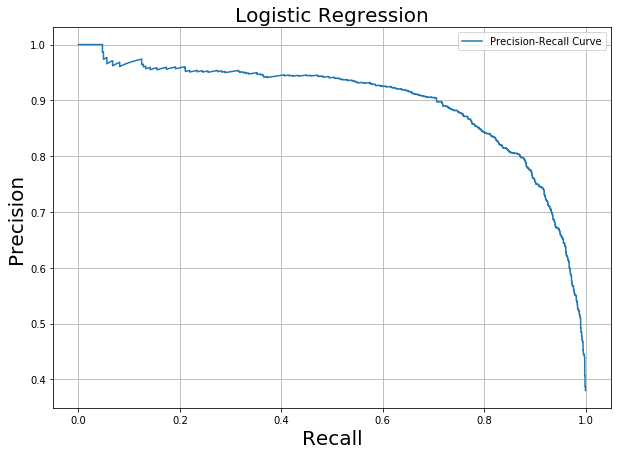

Logistic Regression AUC	 0.896


In [30]:
log_reg_precision, log_reg_recall, _ = precision_recall_curve(y_test, y_pred_log_reg)
random_forest_precision, random_forest_recall, _ = precision_recall_curve(y_test, y_pred_random_forest)
 
precision_recall_curve_show(log_reg_precision, log_reg_recall, "Logistic Regression")
print("Logistic Regression AUC\t", round(auc(log_reg_recall, log_reg_precision),3))

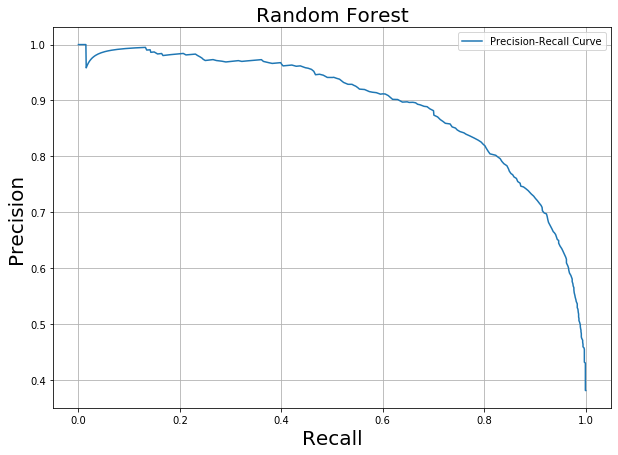

Random Forest AUC	 0.894


In [31]:
precision_recall_curve_show(random_forest_precision, random_forest_recall, "Random Forest")
print("Random Forest AUC\t", round(auc(random_forest_recall, random_forest_precision),3))

В дальнейшем для экспериментов будем использовать логистическую регрессию. 

А теперь вернемся к исходной задаче. На данном этапе решения можно прийти к выводу, что предложенное кодирование текста может быть не самым удачным из-за большой матрицы объект-признак. Это ведет к ситуации, что не всякий алгоритм может быть применен в данной задаче по причине слишком большого признакового пространства, а кроме того, даже быстрые алгоритмы при наличии кросс-валидации могут начать работать медленно. Также в данных может быть шум, так как в качестве словаря были взяты все слова, даже те, которые встречались в одном-двух отзывах (например, опечатки). Поэтому кажется что неплохо было бы сократить размерность данных и по возможности избавиться от шума. 

## 2. Отбор признаков и уменьшение размерности (сделано за вас)

### По частоте
Попробуем сформировать выборку, в которой будут находиться только самые "важные" признаки, то есть в данном случае слова. Например, это можно сделать оставив топ слов по частоте (не считая стоп-слов вроде "a", "the", "it", ...). Кажется, что вхождение наиболее частых слов в отзыве, например, *good*, *bad* и т.д. являются вполне неплохими показателями.

### С помощью машинного обучения
Другой подход — воспользоваться имеющимися методами машинного обучения, а именно обученным на всех признаках случайным лесом. С помощью сдучайного леса есть возможность оценивать важность признаков. То есть можно выбрать топ слов, важных как признаки для задачи классификации. 


Сформируем две новые выборки, где каждый объект будет иметь 15000 признаков, следующим образом:
 - топ самых частотных слов
 - топ наиболее "важных" слов с помощью случайного леса

### Отбор признаков по частоте: оставляем топ 15К самых частых слов.

In [32]:
top_15000_frequences_indices = np.asarray(np.argsort(-X_train_bow.sum(axis=0)))[0][:15000]
print("Indices of top-15K frequent words in the vocabulary are", top_15000_frequences_indices)

Indices of top-15K frequent words in the vocabulary are [55389  2728 38925 ... 37552 53382 47383]


In [33]:
vocab = np.array(vectorizer.get_feature_names())

In [34]:
top_words_frequency = vocab[top_15000_frequences_indices]

In [35]:
X_train_frequency = X_train_bow[:, top_15000_frequences_indices]
X_test_frequency = X_test_bow[:, top_15000_frequences_indices]

In [36]:
print(X_train_frequency.shape)
print(X_test_frequency.shape)

(16000, 15000)
(4000, 15000)


### Отбор признаков с помощью случайного леса.

#### Для начала уберем стоп-слова (предлоги, союзы, местоимения)

In [37]:
vectorizerWithStopWords = CountVectorizer(stop_words='english')
X_train_minus_stop_words = vectorizerWithStopWords.fit_transform(X_train)
vocab_minus_stop_words = np.array(vectorizerWithStopWords.get_feature_names())
X_test_minus_stop_words = vectorizerWithStopWords.transform(X_test)

In [38]:
print(X_train_minus_stop_words.shape)

(16000, 62097)


Как видим, после отсева стоп-слов словарь, полученный по тренировочной выборке, уже имеет меньший размер, чем в предыдущем пункте, что логично (62097 после фильтрации стоп-слов, 62407 без фильтрации стоп-слов)

#### Обучим случайный лес на полученных признаках

In [39]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train_minus_stop_words, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Соберем слова, которые обученный случайный посчитал наиболее важными

In [40]:
importances = rf_clf.feature_importances_
top_importances_random_forest = np.argsort(-importances)[:15000]
top_words_random_forest = vocab_minus_stop_words[top_importances_random_forest]

Преобразуем данные

In [41]:
X_train_rand_forest = X_train_minus_stop_words[:, top_importances_random_forest]
X_test_rand_forest = X_test_minus_stop_words[:, top_importances_random_forest]

In [42]:
print(X_train_rand_forest.shape)
print(X_test_rand_forest.shape)

(16000, 15000)
(4000, 15000)


# Часть 3. Обучение алгоритмов на выборке с пониженной размерностью
# 20 баллов
## 3.1 На трех выборках (*bag-of-words* и двух новых) постройте *roc*-кривые, вычислив площадь под ними - 10 баллов

#### Обучите логистическую регрессию на данных с 15000 признаков, отобранных двумя различными способами

In [43]:
# задаем размер будущего графика
plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

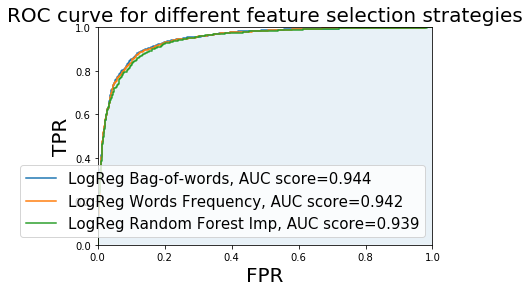

In [44]:
# logreg on Bag-of-words
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train_bow, y_train)
y_pred_lr = logreg.predict_proba(X_test_bow)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
ROC_AUC_score_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label='LogReg Bag-of-words, AUC score={}'.format(round(ROC_AUC_score_lr, 3)))
plt.fill_between(fpr_lr, tpr_lr, alpha=0.1)


# обучите аналогично лог.регрессию и постройте график 
# на датафрейме X_train_frequency со словами, 
# отобранными по частоте
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train_frequency, y_train)
logreg_y_pred_freq = logreg.predict_proba(X_test_frequency)[:, 1]
fpr_lr_freq, tpr_lr_freq, _ = roc_curve(y_test, logreg_y_pred_freq)
ROC_AUC_score_lr_freq = auc(fpr_lr_freq, tpr_lr_freq)
plt.plot(fpr_lr_freq, tpr_lr_freq, label='LogReg Words Frequency, AUC score={}'.format(round(ROC_AUC_score_lr_freq, 3)))
# plt.fill_between(fpr_lr, tpr_lr, alpha=0.1)

# обучите аналогично лог.регрессию и постройте график 
# на датафрейме X_train_rand_forest со словами, 
# отобранными по важности слов, оцененных RandomForest
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train_rand_forest, y_train)
logreg_y_pred_rf = logreg.predict_proba(X_test_rand_forest)[:, 1]
fpr_lr_rf, tpr_lr_rf, _ = roc_curve(y_test, logreg_y_pred_rf)
ROC_AUC_score_lr_rf = auc(fpr_lr_rf, tpr_lr_rf)
plt.plot(fpr_lr_rf, tpr_lr_rf, label='LogReg Random Forest Imp, AUC score={}'.format(round(ROC_AUC_score_lr_rf, 3)))

plt.xlabel('FPR', fontsize=20)
plt.ylabel('TPR', fontsize=20)
plt.title('ROC curve for different feature selection strategies', fontsize=20)
plt.legend(prop={'size':15}, loc='lower right')
plt.xlim([0., 1,])
plt.ylim([0., 1.])
plt.show()

Отличаются ли метрики ROC-AUC для преобразования текста Bag of Words и после сокращения размерности в 3 раза?

**Метрики слабо отличаются, их чего можно сделать вывод что сокрещение размерности указанным способом имеет право на жизнь**


## 3.2 - 5 баллов

Что вы можете сказать о качестве этих подходов к сокращению размерности?
Выведите топ-20 самых важных слов от случайного леса и сравните их с топ-20 наиболее частотных. Много ли общих слов?

In [45]:
# выведите первые 20 элементов списка top_words_frequency
top_words_frequency[:20]

array(['the', 'and', 'of', 'to', 'is', 'br', 'it', 'in', 'this', 'that',
       'was', 'as', 'movie', 'for', 'with', 'but', 'film', 'you', 'on',
       'not'], dtype='<U51')

In [46]:
# выведите первые 20 элементов списка top_words_random_forest
top_words_random_forest[:20]

array(['bad', 'worst', 'great', 'excellent', 'waste', 'wonderful',
       'awful', 'best', 'boring', 'terrible', 'movie', 'worse', 'perfect',
       'plot', 'love', 'minutes', 'just', 'poor', 'amazing', 'favorite'],
      dtype='<U51')

## 3.3 - 5 баллов

Посчитайте, сколько слов находятся в наборах отобранных по частоте и с помощью случайного леса, то есть найдите пересечение этих двух множеств. Какая это доля от 15000 отобранных слов?

Для этого используйте структуру данных `set` в Python. Примеры операций со структурой `set`, в том числе нахождение пересечения множеств, можно найти здесь: https://python-scripts.com/sets 

In [47]:
top_words_freq_set =  set(top_words_frequency)
top_words_random_forest_set = set(top_words_random_forest)

intersection = top_words_freq_set.intersection(top_words_random_forest_set)
len(intersection) / 15000

0.8417333333333333

У вас должно получиться около 12500 общих слов, что составляет 84% от отобранных слов

Таким образом, удалось сократить размерность более чем в три раза без сильной потери в качестве. Но даже 15000 признаков — это достаточно много. Допустим, мы хотим уменьшить размерность до 2000 признаков, однако можно заметить, что даже два предыдущих способа давали небольшое ухудшение в качестве. 

## Часть 4 (продвинутая) - 20 баллов
## Еще более сильное понижение размерности данных

Иногда данные можно описать гораздо меньшим числом признаков. Это позволяет экономить и память на хранение данных, и время обучения алгоритмов - ведь чем меньше признаков, тем бвыстрее обучаются алгоритмы.

В этой части мы попробуем понизить размерность данных в 30 раз с помощью PCA (метод главных компонент) и посмотрим, как такое сильное сжатие влияет на качество классификации

### PCA

Одним из способов сокращения размерности является метод главных компонент ([PCA](https://en.wikipedia.org/wiki/Principal_component_analysis)). Это преобразование позволяет получить вес каждого признака в компоненте. Например, если применить его к bag-of-words, можно найти наиболее важные слова, влияющие на данную компоненту. Для работы с большими разреженными матрицами в sklearn рекомендуется использовать [TruncatedSVD](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

## 4.1 - 10 баллов. Сокращение размерности

Попробуйте сократить размерность до 2000 двумя способами:
 - наилучшим из двух предыдущих
 - для выборки со всеми признаками обучите *PCA*-преобразование 

Постройте новый график качества. Какой из двух подходов работает лучше?

In [48]:
from sklearn.decomposition import TruncatedSVD

truncatedSVD = TruncatedSVD(n_components=2000)
x_train_SVD = truncatedSVD.fit_transform(X_train_bow)
x_train_SVD.shape

(16000, 2000)

In [49]:
x_test_SVD = truncatedSVD.transform(X_test_bow)
x_test_SVD.shape

(4000, 2000)

Теперь снизьте размерность до 2000 признаков с помощью отбора самых частых слов и с помощью случайного леса и выданных им важностей признаков

Вы можете адаптитровать код из части 2, где понижение размерности сделано за вас

In [50]:
top_2000_frequences_indices = np.asarray(np.argsort(-X_train_bow.sum(axis=0)))[0][:2000]
print("Indices of top-2K frequent words in the vocabulary are", top_2000_frequences_indices)

Indices of top-2K frequent words in the vocabulary are [55389  2728 38925 ...  8717 39374  2453]


In [51]:
vectorizer2000 = CountVectorizer()
vectorizer2000.fit(X_train)

vocab2000 = np.array(vectorizer2000.get_feature_names())

In [52]:
top_words_frequency_2000 = vocab2000[top_2000_frequences_indices]

In [53]:
X_train_frequency_2000 = X_train_bow[:, top_2000_frequences_indices]
X_test_frequency_2000 = X_test_bow[:, top_2000_frequences_indices]

In [54]:
print(X_train_frequency_2000.shape)
print(X_test_frequency_2000.shape)

(16000, 2000)
(4000, 2000)


### Отбор признаков с помощью случайного леса.

#### Для начала уберем стоп-слова (предлоги, союзы, местоимения)

In [56]:
vectorizerWithStopWords2000 = CountVectorizer(stop_words='english')
X_train_minus_stop_words2000 = vectorizerWithStopWords2000.fit_transform(X_train)
vocab_minus_stop_words2000 = np.array(vectorizerWithStopWords2000.get_feature_names())
X_test_minus_stop_words2000 = vectorizerWithStopWords2000.transform(X_test)

In [57]:
print(X_train_minus_stop_words2000.shape)

(16000, 62097)


Как видим, после отсева стоп-слов словарь, полученный по тренировочной выборке, уже имеет меньший размер, чем в предыдущем пункте, что логично (62097 после фильтрации стоп-слов, 62407 без фильтрации стоп-слов)

#### Обучим случайный лес на полученных признаках

In [58]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train_minus_stop_words2000, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Соберем слова, которые обученный случайный посчитал наиболее важными

In [59]:
importances = rf_clf.feature_importances_
top_importances_random_forest_2000 = np.argsort(-importances)[:2000]
top_words_random_forest_2000 = vocab_minus_stop_words2000[top_importances_random_forest_2000]

Преобразуем данные

In [60]:
X_train_rand_forest_2000 = X_train_minus_stop_words2000[:, top_importances_random_forest_2000]
X_test_rand_forest_2000 = X_test_minus_stop_words2000[:, top_importances_random_forest_2000]

In [61]:
print(X_train_rand_forest_2000.shape)
print(X_test_rand_forest_2000.shape)

(16000, 2000)
(4000, 2000)


## 4.2 - 5 баллов. Обучение алгоритмов на признаках с пониженной размерностью

### Вновь обучите логистическую регрессию уже на 2000 признаков (RandomForest  и PCA) и постройте ROC-кривые для двух вариантов понижения размерности признаков

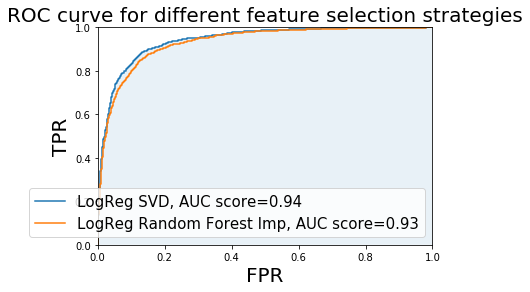

In [62]:
# logreg on Bag-of-words
logreg = LogisticRegression(C=0.1)
logreg.fit(x_train_SVD, y_train)
y_pred_lr = logreg.predict_proba(x_test_SVD)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
ROC_AUC_score_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label='LogReg SVD, AUC score={}'.format(round(ROC_AUC_score_lr, 3)))
plt.fill_between(fpr_lr, tpr_lr, alpha=0.1)


# обучите аналогично лог.регрессию и постройте график 
# на датафрейме X_train_rand_forest со словами, 
# отобранными по важности слов, оцененных RandomForest
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train_rand_forest_2000, y_train)
logreg_y_pred_rf = logreg.predict_proba(X_test_rand_forest_2000)[:, 1]
fpr_lr_rf, tpr_lr_rf, _ = roc_curve(y_test, logreg_y_pred_rf)
ROC_AUC_score_lr_rf = auc(fpr_lr_rf, tpr_lr_rf)
plt.plot(fpr_lr_rf, tpr_lr_rf, label='LogReg Random Forest Imp, AUC score={}'.format(round(ROC_AUC_score_lr_rf, 3)))

plt.xlabel('FPR', fontsize=20)
plt.ylabel('TPR', fontsize=20)
plt.title('ROC curve for different feature selection strategies', fontsize=20)
plt.legend(prop={'size':15}, loc='lower right')
plt.xlim([0., 1,])
plt.ylim([0., 1.])
plt.show()

Повлияло ли понижение размерности в 30 раз на метрики качества (c 60 тыс 2 тыс)?

**Здесь метрики также отличаются незначительно, получается что метод главных компонент в осносном может быть использован только для оптимизации работы алгоритмов с большими датасетами**

## 4.2 - 5 баллов - интерпретация главных компонент
Для первых трех компонент преобразования найдите топ-30 наиболее важных слов. Можете ли вы охарактеризовать как-то каждую из этих групп?

In [122]:
!pip install googletrans

  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15740 sha256=725ba321bba1d1f791b55a7b4e2a20ad07296fb7b23282e9477fc7ed390d2e79
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\20\da\eb\a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [63]:
from googletrans import Translator

In [76]:
vocab = np.asarray( vectorizer.get_feature_names())  
vocab.shape

(62407,)

In [78]:
np.argsort(-truncatedSVD.components_[:3][component_num])[:30]

array([ 7257, 55389, 38925,  8290, 26008, 49179, 60145, 34540, 42237,
       26031, 18608,  2528, 48280, 54904, 21956, 39431, 26626,  5946,
       33929, 29239,  5239, 17197, 30693, 60701, 42644, 20063,  5162,
       38478, 51438,  7630], dtype=int64)

In [79]:
translator = Translator()
for component_num in range(0,3):
    indices = np.argsort(-truncatedSVD.components_[:3][component_num])[:30]
    print('component number: ', component_num)
    for i in range(0,30):
        idx = indices[i]
        word = vocab[idx]
        print('%-30s%-30s%f'%(word,
                              translator.translate(word,src='en',dest='ru').text,
                              truncatedSVD.components_[:3][component_num][idx]))
    print()

component number:  0
the                                                         0.665685
and                           а также                       0.305288
of                            из                            0.284911
to                            в                             0.264953
br                            уш                            0.200393
is                            является                      0.197919
in                            в                             0.183071
it                            Это                           0.166586
that                          который                       0.142923
this                          это                           0.123135
as                            в виде                        0.091014
with                          с                             0.085506
for                           за                            0.083842
was                           было                          0.083554
but          

**Не уверен что тут получилось в итоге правильно (предыдущий вариант выглядел по-другому)
Если судить по этому варианту, то он не дает никакой информации о том, какие слова влияют на компоенты.
Приведенные коэффициенты - всего лишь веса указанных слов в линейном преобразовании, которое соответствует компоненте**